## Objective
Remove the signal that explains $Y$ in $X$

## Setting

Let $Y = [y_1, y_2, \ldots, y_n]' \in R^{n\times d}$, where $y_i = (y_{i1}, y_{i2}, \ldots, y_{id})\in R^d$. Let $X = [1_n, x_1, x_2, \ldots, x_n]' \in R^{n \times (p+1)}$ where $1_n$ is a ones vector and $x_i = (x_{i1}, \ldots, x_{ip})$. Assume that $X$ and $Y$ are continuous random variables, that there is a linear (or a monotonic relationship) between $Y$ and $X$ and that $Y$ is dependent on $X$. We can fit a multivariate linear model:
$$ Y = XB + \epsilon $$

$B\in R^{(p+1)\times d}$ represents the coefficient matrix, and $\epsilon \in R^{n\times d}$ is the residuals. Similar to OLS, we can solve the normal equations, and arrive at the usual form
\begin{align}
\hat{Y} &= X\hat{\beta}\\
&= X(X^TX)^{-1}X^TY
\end{align}
Thus,
\begin{align}
\epsilon &= Y - X\hat{\beta}\\
&= Y - X(X^TX)^{-1}X^T\hat{\beta}
\end{align}

This assumes that $X^TX$ is full rank and the covariance matrix of $\epsilon$ is a diagonal 

In [220]:
def compute_mvlr(X, Y):
    X_ = np.hstack([np.ones((X.shape[0], 1)), X])
    return Y - X_ @ np.linalg.inv(X_.T @ X_) @ X_.T @ Y

In [337]:
def plot_pairwise(X, Y):
    p = X.shape[1]
    d = Y.shape[1]
    fig, ax = plt.subplots(nrows = d, ncols=p, figsize=(10, 10), sharex=True, sharey=True)

    for ydx in range(d):
        if ydx == d-1:
            for i in range(p):
                ax[ydx, i].set_xlabel('X dimension {}'.format(i + 1))
        for xdx in range(p):
            if xdx == 0:
                ax[ydx, xdx].set_ylabel('Y dimension {}'.format(ydx + 1))
            ax[ydx, xdx].scatter(X[:, xdx], Y[:, ydx])

### Sample data

$$ 
X \sim Unif(-1, 1) \in R^{n\times p} \\
Y \sim Xw + c \in R^{n\times d}
$$
where
$$
w \sim Unif(-1, 1) \in R^{p \times d}\\
c \sim Unif(1, 2) \in R^{1 \times d}
$$

We set the following:

$$
n = 100\\
p = 3\\
d = 5
$$

In [314]:
n = 100
p = 2
d = 3

X = np.random.uniform(-1, 1, size=(n, p))
w = np.random.uniform(-1, 1, size=(p, d))
c = np.random.uniform(1, 2, size=(1, d))
Y = X @ w + c

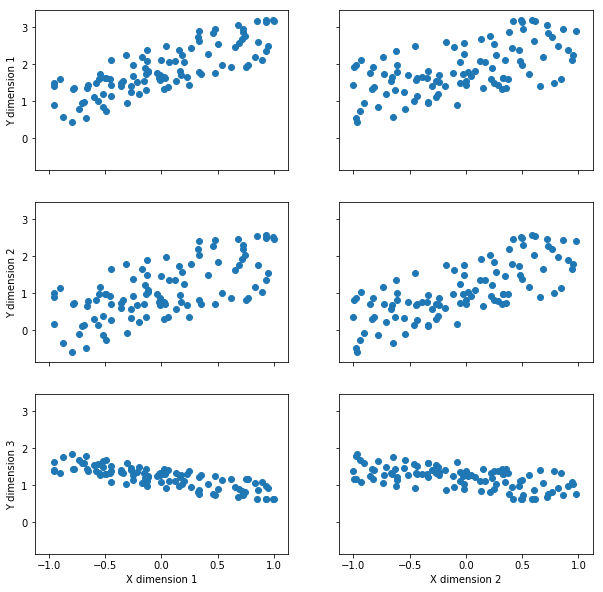

In [338]:
plot_pairwise(X, Y)

In [339]:
E = compute_mvlr(X, Y)

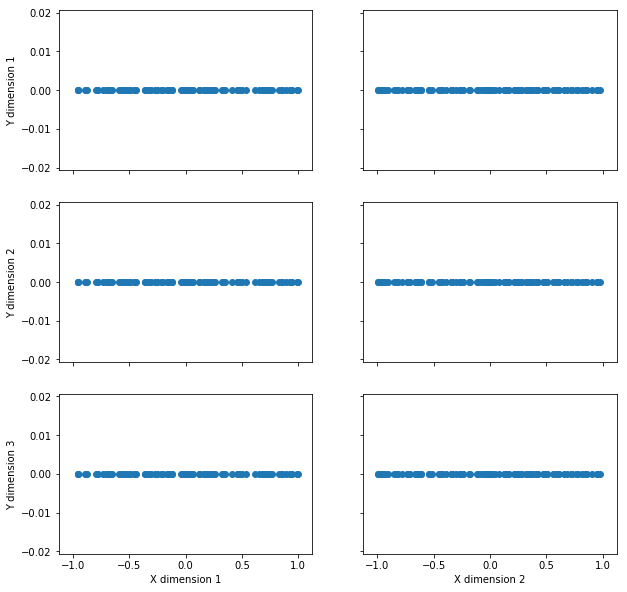

In [341]:
plot_pairwise(X, E)